In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1.0 Battles

1.1.1 Data Overview

In [98]:
#wrangle function

def wrangle(file):
    #read csv file
    df = pd.read_csv(file)

    #columns to drop
    cols_to_drop = ['attacker_2', 'attacker_3', 'attacker_4', 'defender_2','defender_3', 'defender_4', 'note'] 
    
    #drop columns
    df.drop(columns=cols_to_drop, inplace=True)



    #return a dataframe
    return df


In [99]:
df1 = wrangle('battles.csv')

In [100]:
#Check the first few rows
df1.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands


In [101]:
#Column names & types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   defender_1          37 non-null     object 
 7   attacker_outcome    37 non-null     object 
 8   battle_type         37 non-null     object 
 9   major_death         37 non-null     float64
 10  major_capture       37 non-null     float64
 11  attacker_size       24 non-null     float64
 12  defender_size       19 non-null     float64
 13  attacker_commander  37 non-null     object 
 14  defender_commander  28 non-null     object 
 15  summer              37 non-null     float64
 16  location  

In [102]:
#Summary statistics
df1.describe()

,year,battle_number,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [103]:
#Check missing values
df1.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
defender_1             1
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
dtype: int64

In [104]:
#Check unique values
df1.nunique()

name                  38
year                   3
battle_number         38
attacker_king          4
defender_king          6
attacker_1            11
defender_1            12
attacker_outcome       2
battle_type            4
major_death            2
major_capture          2
attacker_size         19
defender_size         14
attacker_commander    31
defender_commander    28
summer                 2
location              27
region                 7
dtype: int64

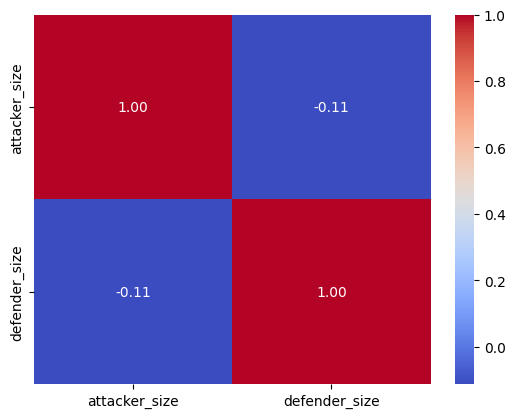

In [105]:
df = df1[['attacker_size', 'defender_size']]
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f');

1.1.2 Data Cleaning & Preprocessing

1.1.3 Single Variable Analysis

1.1.4 Two Variable Analysis

1.1.5 Multiple Analysis